# UPC Quantum Engineering Final Project: Quantum Channel Discrimination

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

## Amplitude damping channel

According to chapter 8.3.5 from Nielsend and Chuang

In [2]:
# Create 2 qbits circuit and 1 output classical bit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Create the circuit gates
circuit.reset(qreg_q[1])
circuit.cry(pi/2, qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[1], creg_c[0])

# Draw the circuit
circuit.draw()

┌───┐   
q_0: ──────────■─────┤ X ├───
          ┌────┴────┐└─┬─┘┌─┐
q_1: ─|0>─┤ RY(π/2) ├──■──┤M├
          └─────────┘     └╥┘
c: 1/══════════════════════╩═
                           0

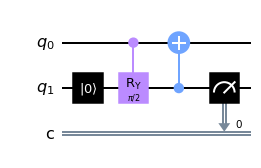

In [3]:
# Draw better the circuit
circuit.draw('mpl')

In [6]:
# Import Aer
from qiskit import Aer, execute
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')


In [7]:

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circuit, backend_sim, shots=5000)

# Grab the results from the job.
results_sim = job_sim.result()

In [8]:
counts = results_sim.get_counts(circuit)
print(counts)

{'0': 5000}


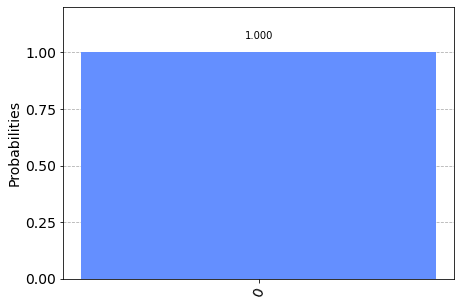

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)